## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Find Reference Image for Atlas-based Segmentation of MR Knee Images](https://sbonaretti.github.io/pyKNEEr/segmentation.html)

The reference image is found in an iterative way, as the image whose vector field is the closest to the average of the vector fields at that iteration. Iterations stop at convergence or at a defined iteration number.

The image used to initialize the first iteration was determined using a random function, which was initialized with an arbitrarily chosen seed number for reproducibility ([here](https://github.com/sbonaretti/pyKNEEr/blob/master/code/find_reference_random_gen.py)) 

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io            as io
from pykneer import find_reference_for_nb as find

## Image information

Inputs:   
- `input_file_name` contains the list of the preprocessed images of the dataset
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)

In [3]:
# Sherlock
input_file_name = "./image_list_find_reference_16.txt"
n_of_cores      = 10

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_find_reference(input_file_name)

-> image information loaded


## Find reference
Run the convergence study to find the reference as the image whose vector field is the closest to the average of the vector fields at that iteration

In [5]:
reference_names, min_distances = find.find_reference(image_data, n_of_cores)

-> Iteration: 1
   1. Preparing reference YR04_16_DESS_prep.mha
   2. Registering images to current reference
-> Vector fields calculated
   3. Computing new reference
    YR04_01_DESS_prep_VF.mha
      norm before normalization: 894.5672
      norm after normalization: 0.00020824785795677087
      number of image voxels: 23592960
      snumber of masked voxels: 4295685
    YR04_02_DESS_prep_VF.mha
      norm before normalization: 3246.9473
      norm after normalization: 0.0007558625145058356
      number of image voxels: 23592960
      snumber of masked voxels: 4295685
    YR04_03_DESS_prep_VF.mha
      norm before normalization: 1350.4944
      norm after normalization: 0.0003143839422037754
      number of image voxels: 23592960
      snumber of masked voxels: 4295685
    YR04_04_DESS_prep_VF.mha
      norm before normalization: 3110.2
      norm after normalization: 0.0007240288687768948
      number of image voxels: 23592960
      snumber of masked voxels: 4295685
    YR04_05_DES

## Show results
The graph shows the images whose distance to the average vector field is the minimum, at each iteration. The image at the current iteration is used as the reference image for the following iteration.

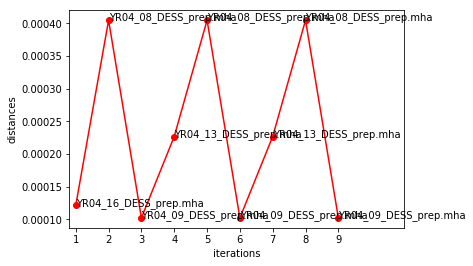

In [6]:
find.plot_convergence(reference_names, min_distances)

### Dependencies

In [7]:
%load_ext watermark
%watermark -v -m -p SimpleITK,numpy,matplotlib,multiprocessing

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
numpy 1.14.5
matplotlib 2.2.2
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-862.14.4.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
